The United States and Great Britain are two countries separated by a common language.

George Bernard Shaw
For those annoying times when Americans need to submit articles to MNRAS, or Brits to ApJ.

Absolutely no guarantees that this won't replace some vital bit of LaTeX and screw up your document.

Word list originally from http://www.tysto.com/uk-us-spelling-list.html

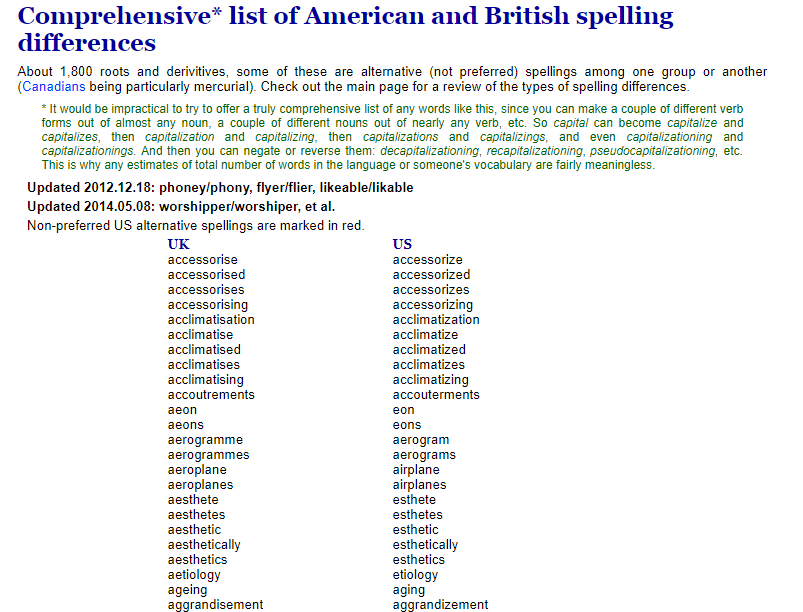

- 위에서 제공되는 서로 스펠링이다른 UK 단어와 US 단어의 조합 (사전)을 활용해서 keyword를 변경하는 작업을 진행했다.
- UK 단어 리스트에 있는 단어가 있으면 변경이 되고 없으면 병경이 되지 않게끔 적용했다.

- 추가로 american english to british english translator api를 활용하여 특정 단어들을 random으로 검토해보았다.
- https://codewordsolver.com/american-british-english-translator

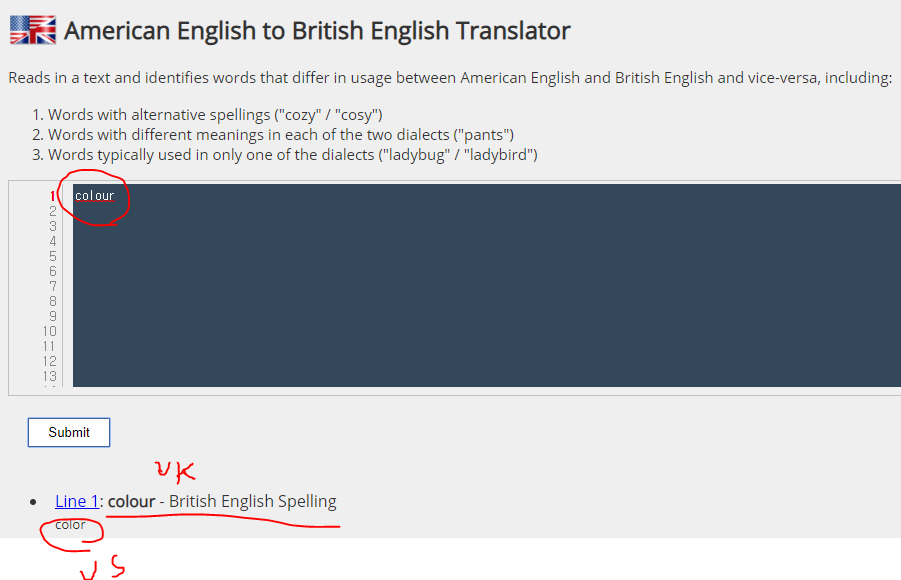

In [1]:
import re,sys

wordpairs = [
    (' accessorise ',' accessorize '),
    (' accessorised ',' accessorized '),
    (' accessorises ',' accessorizes '),
    (' accessorising ',' accessorizing '),
    (' acclimatisation ',' acclimatization '),
    (' acclimatise ',' acclimatize '),
    (' acclimatised ',' acclimatized '),
    (' acclimatises ',' acclimatizes '),
    (' acclimatising ',' acclimatizing '),
    (' accoutrements ',' accouterments '),
    (' aeon ',' eon '),
    (' aeons ',' eons '),
    (' aerogramme ',' aerogram '),
    (' aerogrammes ',' aerograms '),
    (' aeroplane ',' airplane '),
    (' aeroplanes ',' airplanes '),
    (' aesthete ',' esthete '),
    (' aesthetes ',' esthetes '),
    (' aesthetic ',' esthetic '),
    (' aesthetically ',' esthetically '),
    (' aesthetics ',' esthetics '),
    (' aetiology ',' etiology '),
    (' ageing ',' aging '),
    (' aggrandisement ',' aggrandizement '),
    (' agonise ',' agonize '),
    (' agonised ',' agonized '),
    (' agonises ',' agonizes '),
    (' agonising ',' agonizing '),
    (' agonisingly ',' agonizingly '),
    (' almanack ',' almanac '),
    (' almanacks ',' almanacs '),
    (' aluminium ',' aluminum '),
    (' amortisable ',' amortizable '),
    (' amortisation ',' amortization '),
    (' amortisations ',' amortizations '),
    (' amortise ',' amortize '),
    (' amortised ',' amortized '),
    (' amortises ',' amortizes '),
    (' amortising ',' amortizing '),
    (' amphitheatre ',' amphitheater '),
    (' amphitheatres ',' amphitheaters '),
    (' anaemia ',' anemia '),
    (' anaemic ',' anemic '),
    (' anaesthesia ',' anesthesia '),
    (' anaesthetic ',' anesthetic '),
    (' anaesthetics ',' anesthetics '),
    (' anaesthetise ',' anesthetize '),
    (' anaesthetised ',' anesthetized '),
    (' anaesthetises ',' anesthetizes '),
    (' anaesthetising ',' anesthetizing '),
    (' anaesthetist ',' anesthetist '),
    (' anaesthetists ',' anesthetists '),
    (' anaesthetize ',' anesthetize '),
    (' anaesthetized ',' anesthetized '),
    (' anaesthetizes ',' anesthetizes '),
    (' anaesthetizing ',' anesthetizing '),
    (' analogue ',' analog '),
    (' analogues ',' analogs '),
    (' analyse ',' analyze '),
    (' analysed ',' analyzed '),
    (' analyses ',' analyzes '),
    (' analysing ',' analyzing '),
    (' anglicise ',' anglicize '),
    (' anglicised ',' anglicized '),
    (' anglicises ',' anglicizes '),
    (' anglicising ',' anglicizing '),
    (' annualised ',' annualized '),
    (' antagonise ',' antagonize '),
    (' antagonised ',' antagonized '),
    (' antagonises ',' antagonizes '),
    (' antagonising ',' antagonizing '),
    (' apologise ',' apologize '),
    (' apologised ',' apologized '),
    (' apologises ',' apologizes '),
    (' apologising ',' apologizing '),
    (' appal ',' appall '),
    (' appals ',' appalls '),
    (' appetiser ',' appetizer '),
    (' appetisers ',' appetizers '),
    (' appetising ',' appetizing '),
    (' appetisingly ',' appetizingly '),
    (' arbour ',' arbor '),
    (' arbours ',' arbors '),
    (' archaeological ',' archeological '),
    (' archaeologically ',' archeologically '),
    (' archaeologist ',' archeologist '),
    (' archaeologists ',' archeologists '),
    (' archaeology ',' archeology '),
    (' ardour ',' ardor '),
    (' armour ',' armor '),
    (' armoured ',' armored '),
    (' armourer ',' armorer '),
    (' armourers ',' armorers '),
    (' armouries ',' armories '),
    (' armoury ',' armory '),
    (' artefact ',' artifact '),
    (' artefacts ',' artifacts '),
    (' authorise ',' authorize '),
    (' authorised ',' authorized '),
    (' authorises ',' authorizes '),
    (' authorising ',' authorizing '),
    (' axe ',' ax '),
    (' backpedalled ',' backpedaled '),
    (' backpedalling ',' backpedaling '),
    (' bannister ',' banister '),
    (' bannisters ',' banisters '),
    (' baptise ',' baptize '),
    (' baptised ',' baptized '),
    (' baptises ',' baptizes '),
    (' baptising ',' baptizing '),
    (' bastardise ',' bastardize '),
    (' bastardised ',' bastardized '),
    (' bastardises ',' bastardizes '),
    (' bastardising ',' bastardizing '),
    (' battleaxe ',' battleax '),
    (' baulk ',' balk '),
    (' baulked ',' balked '),
    (' baulking ',' balking '),
    (' baulks ',' balks '),
    (' bedevilled ',' bedeviled '),
    (' bedevilling ',' bedeviling '),
    (' behaviour ',' behavior '),
    (' behavioural ',' behavioral '),
    (' behaviourism ',' behaviorism '),
    (' behaviourist ',' behaviorist '),
    (' behaviourists ',' behaviorists '),
    (' behaviours ',' behaviors '),
    (' behove ',' behoove '),
    (' behoved ',' behooved '),
    (' behoves ',' behooves '),
    (' bejewelled ',' bejeweled '),
    (' belabour ',' belabor '),
    (' belaboured ',' belabored '),
    (' belabouring ',' belaboring '),
    (' belabours ',' belabors '),
    (' bevelled ',' beveled '),
    (' bevvies ',' bevies '),
    (' bevvy ',' bevy '),
    (' biassed ',' biased '),
    (' biassing ',' biasing '),
    (' bingeing ',' binging '),
    (' bougainvillaea ',' bougainvillea '),
    (' bougainvillaeas ',' bougainvilleas '),
    (' bowdlerise ',' bowdlerize '),
    (' bowdlerised ',' bowdlerized '),
    (' bowdlerises ',' bowdlerizes '),
    (' bowdlerising ',' bowdlerizing '),
    (' breathalyse ',' breathalyze '),
    (' breathalysed ',' breathalyzed '),
    (' breathalyser ',' breathalyzer '),
    (' breathalysers ',' breathalyzers '),
    (' breathalyses ',' breathalyzes '),
    (' breathalysing ',' breathalyzing '),
    (' brutalise ',' brutalize '),
    (' brutalised ',' brutalized '),
    (' brutalises ',' brutalizes '),
    (' brutalising ',' brutalizing '),
    (' buses ',' busses '),
    (' busing ',' bussing '),
    (' caesarean ',' cesarean '),
    (' caesareans ',' cesareans '),
    (' calibre ',' caliber '),
    (' calibres ',' calibers '),
    (' calliper ',' caliper '),
    (' callipers ',' calipers '),
    (' callisthenics ',' calisthenics '),
    (' canalise ',' canalize '),
    (' canalised ',' canalized '),
    (' canalises ',' canalizes '),
    (' canalising ',' canalizing '),
    (' cancellation ',' cancelation '),
    (' cancellations ',' cancelations '),
    (' cancelled ',' canceled '),
    (' cancelling ',' canceling '),
    (' candour ',' candor '),
    (' cannibalise ',' cannibalize '),
    (' cannibalised ',' cannibalized '),
    (' cannibalises ',' cannibalizes '),
    (' cannibalising ',' cannibalizing '),
    (' canonise ',' canonize '),
    (' canonised ',' canonized '),
    (' canonises ',' canonizes '),
    (' canonising ',' canonizing '),
    (' capitalise ',' capitalize '),
    (' capitalised ',' capitalized '),
    (' capitalises ',' capitalizes '),
    (' capitalising ',' capitalizing '),
    (' caramelise ',' caramelize '),
    (' caramelised ',' caramelized '),
    (' caramelises ',' caramelizes '),
    (' caramelising ',' caramelizing '),
    (' carbonise ',' carbonize '),
    (' carbonised ',' carbonized '),
    (' carbonises ',' carbonizes '),
    (' carbonising ',' carbonizing '),
    (' carolled ',' caroled '),
    (' carolling ',' caroling '),
    (' catalogue ',' catalog '),
    (' catalogued ',' cataloged '),
    (' catalogues ',' catalogs '),
    (' cataloguing ',' cataloging '),
    (' catalyse ',' catalyze '),
    (' catalysed ',' catalyzed '),
    (' catalyses ',' catalyzes '),
    (' catalysing ',' catalyzing '),
    (' categorise ',' categorize '),
    (' categorised ',' categorized '),
    (' categorises ',' categorizes '),
    (' categorising ',' categorizing '),
    (' cauterise ',' cauterize '),
    (' cauterised ',' cauterized '),
    (' cauterises ',' cauterizes '),
    (' cauterising ',' cauterizing '),
    (' cavilled ',' caviled '),
    (' cavilling ',' caviling '),
    (' centigramme ',' centigram '),
    (' centigrammes ',' centigrams '),
    (' centilitre ',' centiliter '),
    (' centilitres ',' centiliters '),
    (' centimetre ',' centimeter '),
    (' centimetres ',' centimeters '),
    (' centralise ',' centralize '),
    (' centralised ',' centralized '),
    (' centralises ',' centralizes '),
    (' centralising ',' centralizing '),
    (' centre ',' center '),
    (' centred ',' centered '),
    (' centrefold ',' centerfold '),
    (' centrefolds ',' centerfolds '),
    (' centrepiece ',' centerpiece '),
    (' centrepieces ',' centerpieces '),
    (' centres ',' centers '),
    (' channelled ',' channeled '),
    (' channelling ',' channeling '),
    (' characterise ',' characterize '),
    (' characterised ',' characterized '),
    (' characterises ',' characterizes '),
    (' characterising ',' characterizing '),
    (' cheque ',' check '),
    (' chequebook ',' checkbook '),
    (' chequebooks ',' checkbooks '),
    (' chequered ',' checkered '),
    (' cheques ',' checks '),
    (' chilli ',' chili '),
    (' chimaera ',' chimera '),
    (' chimaeras ',' chimeras '),
    (' chiselled ',' chiseled '),
    (' chiselling ',' chiseling '),
    (' circularise ',' circularize '),
    (' circularised ',' circularized '),
    (' circularises ',' circularizes '),
    (' circularising ',' circularizing '),
    (' civilise ',' civilize '),
    (' civilised ',' civilized '),
    (' civilises ',' civilizes '),
    (' civilising ',' civilizing '),
    (' clamour ',' clamor '),
    (' clamoured ',' clamored '),
    (' clamouring ',' clamoring '),
    (' clamours ',' clamors '),
    (' clangour ',' clangor '),
    (' clarinettist ',' clarinetist '),
    (' clarinettists ',' clarinetists '),
    (' collectivise ',' collectivize '),
    (' collectivised ',' collectivized '),
    (' collectivises ',' collectivizes '),
    (' collectivising ',' collectivizing '),
    (' colonisation ',' colonization '),
    (' colonise ',' colonize '),
    (' colonised ',' colonized '),
    (' coloniser ',' colonizer '),
    (' colonisers ',' colonizers '),
    (' colonises ',' colonizes '),
    (' colonising ',' colonizing '),
    (' colour ',' color '),
    (' colourant ',' colorant '),
    (' colourants ',' colorants '),
    (' coloured ',' colored '),
    (' coloureds ',' coloreds '),
    (' colourful ',' colorful '),
    (' colourfully ',' colorfully '),
    (' colouring ',' coloring '),
    (' colourize ',' colorize '),
    (' colourized ',' colorized '),
    (' colourizes ',' colorizes '),
    (' colourizing ',' colorizing '),
    (' colourless ',' colorless '),
    (' colours ',' colors '),
    (' commercialise ',' commercialize '),
    (' commercialised ',' commercialized '),
    (' commercialises ',' commercializes '),
    (' commercialising ',' commercializing '),
    (' compartmentalise ',' compartmentalize '),
    (' compartmentalised ',' compartmentalized '),
    (' compartmentalises ',' compartmentalizes '),
    (' compartmentalising ',' compartmentalizing '),
    (' computerise ',' computerize '),
    (' computerised ',' computerized '),
    (' computerises ',' computerizes '),
    (' computerising ',' computerizing '),
    (' conceptualise ',' conceptualize '),
    (' conceptualised ',' conceptualized '),
    (' conceptualises ',' conceptualizes '),
    (' conceptualising ',' conceptualizing '),
    (' connexion ',' connection '),
    (' connexions ',' connections '),
    (' contextualise ',' contextualize '),
    (' contextualised ',' contextualized '),
    (' contextualises ',' contextualizes '),
    (' contextualising ',' contextualizing '),
    (' cosier ',' cozier '),
    (' cosies ',' cozies '),
    (' cosiest ',' coziest '),
    (' cosily ',' cozily '),
    (' cosiness ',' coziness '),
    (' cosy ',' cozy '),
    (' councillor ',' councilor '),
    (' councillors ',' councilors '),
    (' counselled ',' counseled '),
    (' counselling ',' counseling '),
    (' counsellor ',' counselor '),
    (' counsellors ',' counselors '),
    (' crenellated ',' crenelated '),
    (' criminalise ',' criminalize '),
    (' criminalised ',' criminalized '),
    (' criminalises ',' criminalizes '),
    (' criminalising ',' criminalizing '),
    (' criticise ',' criticize '),
    (' criticised ',' criticized '),
    (' criticises ',' criticizes '),
    (' criticising ',' criticizing '),
    (' crueller ',' crueler '),
    (' cruellest ',' cruelest '),
    (' crystallisation ',' crystallization '),
    (' crystallise ',' crystallize '),
    (' crystallised ',' crystallized '),
    (' crystallises ',' crystallizes '),
    (' crystallising ',' crystallizing '),
    (' cudgelled ',' cudgeled '),
    (' cudgelling ',' cudgeling '),
    (' customise ',' customize '),
    (' customised ',' customized '),
    (' customises ',' customizes '),
    (' customising ',' customizing '),
    (' cypher ',' cipher '),
    (' cyphers ',' ciphers '),
    (' decentralisation ',' decentralization '),
    (' decentralise ',' decentralize '),
    (' decentralised ',' decentralized '),
    (' decentralises ',' decentralizes '),
    (' decentralising ',' decentralizing '),
    (' decriminalisation ',' decriminalization '),
    (' decriminalise ',' decriminalize '),
    (' decriminalised ',' decriminalized '),
    (' decriminalises ',' decriminalizes '),
    (' decriminalising ',' decriminalizing '),
    (' defence ',' defense '),
    (' defenceless ',' defenseless '),
    (' defences ',' defenses '),
    (' dehumanisation ',' dehumanization '),
    (' dehumanise ',' dehumanize '),
    (' dehumanised ',' dehumanized '),
    (' dehumanises ',' dehumanizes '),
    (' dehumanising ',' dehumanizing '),
    (' demeanour ',' demeanor '),
    (' demilitarisation ',' demilitarization '),
    (' demilitarise ',' demilitarize '),
    (' demilitarised ',' demilitarized '),
    (' demilitarises ',' demilitarizes '),
    (' demilitarising ',' demilitarizing '),
    (' demobilisation ',' demobilization '),
    (' demobilise ',' demobilize '),
    (' demobilised ',' demobilized '),
    (' demobilises ',' demobilizes '),
    (' demobilising ',' demobilizing '),
    (' democratisation ',' democratization '),
    (' democratise ',' democratize '),
    (' democratised ',' democratized '),
    (' democratises ',' democratizes '),
    (' democratising ',' democratizing '),
    (' demonise ',' demonize '),
    (' demonised ',' demonized '),
    (' demonises ',' demonizes '),
    (' demonising ',' demonizing '),
    (' demoralisation ',' demoralization '),
    (' demoralise ',' demoralize '),
    (' demoralised ',' demoralized '),
    (' demoralises ',' demoralizes '),
    (' demoralising ',' demoralizing '),
    (' denationalisation ',' denationalization '),
    (' denationalise ',' denationalize '),
    (' denationalised ',' denationalized '),
    (' denationalises ',' denationalizes '),
    (' denationalising ',' denationalizing '),
    (' deodorise ',' deodorize '),
    (' deodorised ',' deodorized '),
    (' deodorises ',' deodorizes '),
    (' deodorising ',' deodorizing '),
    (' depersonalise ',' depersonalize '),
    (' depersonalised ',' depersonalized '),
    (' depersonalises ',' depersonalizes '),
    (' depersonalising ',' depersonalizing '),
    (' deputise ',' deputize '),
    (' deputised ',' deputized '),
    (' deputises ',' deputizes '),
    (' deputising ',' deputizing '),
    (' desensitisation ',' desensitization '),
    (' desensitise ',' desensitize '),
    (' desensitised ',' desensitized '),
    (' desensitises ',' desensitizes '),
    (' desensitising ',' desensitizing '),
    (' destabilisation ',' destabilization '),
    (' destabilise ',' destabilize '),
    (' destabilised ',' destabilized '),
    (' destabilises ',' destabilizes '),
    (' destabilising ',' destabilizing '),
    (' dialled ',' dialed '),
    (' dialling ',' dialing '),
    (' dialogue ',' dialog '),
    (' dialogues ',' dialogs '),
    (' diarrhoea ',' diarrhea '),
    (' digitise ',' digitize '),
    (' digitised ',' digitized '),
    (' digitises ',' digitizes '),
    (' digitising ',' digitizing '),
    (' disc ',' disk '),
    (' discolour ',' discolor '),
    (' discoloured ',' discolored '),
    (' discolouring ',' discoloring '),
    (' discolours ',' discolors '),
    (' discs ',' disks '),
    (' discy ',' disky '),
    (' disembowelled ',' disemboweled '),
    (' disembowelling ',' disemboweling '),
    (' disfavour ',' disfavor '),
    (' dishevelled ',' disheveled '),
    (' dishonour ',' dishonor '),
    (' dishonourable ',' dishonorable '),
    (' dishonourably ',' dishonorably '),
    (' dishonoured ',' dishonored '),
    (' dishonouring ',' dishonoring '),
    (' dishonours ',' dishonors '),
    (' disorganisation ',' disorganization '),
    (' disorganised ',' disorganized '),
    (' distil ',' distill '),
    (' distils ',' distills '),
    (' dramatisation ',' dramatization '),
    (' dramatisations ',' dramatizations '),
    (' dramatise ',' dramatize '),
    (' dramatised ',' dramatized '),
    (' dramatises ',' dramatizes '),
    (' dramatising ',' dramatizing '),
    (' draught ',' draft '),
    (' draughtboard ',' draftboard '),
    (' draughtboards ',' draftboards '),
    (' draughtier ',' draftier '),
    (' draughtiest ',' draftiest '),
    (' draughts ',' drafts '),
    (' draughtsman ',' draftsman '),
    (' draughtsmanship ',' draftsmanship '),
    (' draughtsmen ',' draftsmen '),
    (' draughtswoman ',' draftswoman '),
    (' draughtswomen ',' draftswomen '),
    (' draughty ',' drafty '),
    (' drivelled ',' driveled '),
    (' drivelling ',' driveling '),
    (' duelled ',' dueled '),
    (' duelling ',' dueling '),
    (' economise ',' economize '),
    (' economised ',' economized '),
    (' economises ',' economizes '),
    (' economising ',' economizing '),
    (' edoema ',' edema '),
    (' editorialise ',' editorialize '),
    (' editorialised ',' editorialized '),
    (' editorialises ',' editorializes '),
    (' editorialising ',' editorializing '),
    (' empathise ',' empathize '),
    (' empathised ',' empathized '),
    (' empathises ',' empathizes '),
    (' empathising ',' empathizing '),
    (' emphasise ',' emphasize '),
    (' emphasised ',' emphasized '),
    (' emphasises ',' emphasizes '),
    (' emphasising ',' emphasizing '),
    (' enamelled ',' enameled '),
    (' enamelling ',' enameling '),
    (' enamoured ',' enamored '),
    (' encyclopaedia ',' encyclopedia '),
    (' encyclopaedias ',' encyclopedias '),
    (' encyclopaedic ',' encyclopedic '),
    (' endeavour ',' endeavor '),
    (' endeavoured ',' endeavored '),
    (' endeavouring ',' endeavoring '),
    (' endeavours ',' endeavors '),
    (' energise ',' energize '),
    (' energised ',' energized '),
    (' energises ',' energizes '),
    (' energising ',' energizing '),
    (' enrol ',' enroll '),
    (' enrols ',' enrolls '),
    (' enthral ',' enthrall '),
    (' enthrals ',' enthralls '),
    (' epaulette ',' epaulet '),
    (' epaulettes ',' epaulets '),
    (' epicentre ',' epicenter '),
    (' epicentres ',' epicenters '),
    (' epilogue ',' epilog '),
    (' epilogues ',' epilogs '),
    (' epitomise ',' epitomize '),
    (' epitomised ',' epitomized '),
    (' epitomises ',' epitomizes '),
    (' epitomising ',' epitomizing '),
    (' equalisation ',' equalization '),
    (' equalise ',' equalize '),
    (' equalised ',' equalized '),
    (' equaliser ',' equalizer '),
    (' equalisers ',' equalizers '),
    (' equalises ',' equalizes '),
    (' equalising ',' equalizing '),
    (' eulogise ',' eulogize '),
    (' eulogised ',' eulogized '),
    (' eulogises ',' eulogizes '),
    (' eulogising ',' eulogizing '),
    (' evangelise ',' evangelize '),
    (' evangelised ',' evangelized '),
    (' evangelises ',' evangelizes '),
    (' evangelising ',' evangelizing '),
    (' exorcise ',' exorcize '),
    (' exorcised ',' exorcized '),
    (' exorcises ',' exorcizes '),
    (' exorcising ',' exorcizing '),
    (' extemporisation ',' extemporization '),
    (' extemporise ',' extemporize '),
    (' extemporised ',' extemporized '),
    (' extemporises ',' extemporizes '),
    (' extemporising ',' extemporizing '),
    (' externalisation ',' externalization '),
    (' externalisations ',' externalizations '),
    (' externalise ',' externalize '),
    (' externalised ',' externalized '),
    (' externalises ',' externalizes '),
    (' externalising ',' externalizing '),
    (' factorise ',' factorize '),
    (' factorised ',' factorized '),
    (' factorises ',' factorizes '),
    (' factorising ',' factorizing '),
    (' faecal ',' fecal '),
    (' faeces ',' feces '),
    (' familiarisation ',' familiarization '),
    (' familiarise ',' familiarize '),
    (' familiarised ',' familiarized '),
    (' familiarises ',' familiarizes '),
    (' familiarising ',' familiarizing '),
    (' fantasise ',' fantasize '),
    (' fantasised ',' fantasized '),
    (' fantasises ',' fantasizes '),
    (' fantasising ',' fantasizing '),
    (' favour ',' favor '),
    (' favourable ',' favorable '),
    (' favourably ',' favorably '),
    (' favoured ',' favored '),
    (' favouring ',' favoring '),
    (' favourite ',' favorite '),
    (' favourites ',' favorites '),
    (' favouritism ',' favoritism '),
    (' favours ',' favors '),
    (' feminise ',' feminize '),
    (' feminised ',' feminized '),
    (' feminises ',' feminizes '),
    (' feminising ',' feminizing '),
    (' fertilisation ',' fertilization '),
    (' fertilise ',' fertilize '),
    (' fertilised ',' fertilized '),
    (' fertiliser ',' fertilizer '),
    (' fertilisers ',' fertilizers '),
    (' fertilises ',' fertilizes '),
    (' fertilising ',' fertilizing '),
    (' fervour ',' fervor '),
    (' fibre ',' fiber '),
    (' fibreglass ',' fiberglass '),
    (' fibres ',' fibers '),
    (' fictionalisation ',' fictionalization '),
    (' fictionalisations ',' fictionalizations '),
    (' fictionalise ',' fictionalize '),
    (' fictionalised ',' fictionalized '),
    (' fictionalises ',' fictionalizes '),
    (' fictionalising ',' fictionalizing '),
    (' fillet ',' filet '),
    (' filleted ',' fileted '),
    (' filleting ',' fileting '),
    (' fillets ',' filets '),
    (' finalisation ',' finalization '),
    (' finalise ',' finalize '),
    (' finalised ',' finalized '),
    (' finalises ',' finalizes '),
    (' finalising ',' finalizing '),
    (' flautist ',' flutist '),
    (' flautists ',' flutists '),
    (' flavour ',' flavor '),
    (' flavoured ',' flavored '),
    (' flavouring ',' flavoring '),
    (' flavourings ',' flavorings '),
    (' flavourless ',' flavorless '),
    (' flavours ',' flavors '),
    (' flavoursome ',' flavorsome '),
    (' flyer/flier ',' flier/flyer '),
    (' foetal ',' fetal '),
    (' foetid ',' fetid '),
    (' foetus ',' fetus '),
    (' foetuses ',' fetuses '),
    (' formalisation ',' formalization '),
    (' formalise ',' formalize '),
    (' formalised ',' formalized '),
    (' formalises ',' formalizes '),
    (' formalising ',' formalizing '),
    (' fossilisation ',' fossilization '),
    (' fossilise ',' fossilize '),
    (' fossilised ',' fossilized '),
    (' fossilises ',' fossilizes '),
    (' fossilising ',' fossilizing '),
    (' fraternisation ',' fraternization '),
    (' fraternise ',' fraternize '),
    (' fraternised ',' fraternized '),
    (' fraternises ',' fraternizes '),
    (' fraternising ',' fraternizing '),
    (' fulfil ',' fulfill '),
    (' fulfilment ',' fulfillment '),
    (' fulfils ',' fulfills '),
    (' funnelled ',' funneled '),
    (' funnelling ',' funneling '),
    (' galvanise ',' galvanize '),
    (' galvanised ',' galvanized '),
    (' galvanises ',' galvanizes '),
    (' galvanising ',' galvanizing '),
    (' gambolled ',' gamboled '),
    (' gambolling ',' gamboling '),
    (' gaol ',' jail '),
    (' gaolbird ',' jailbird '),
    (' gaolbirds ',' jailbirds '),
    (' gaolbreak ',' jailbreak '),
    (' gaolbreaks ',' jailbreaks '),
    (' gaoled ',' jailed '),
    (' gaoler ',' jailer '),
    (' gaolers ',' jailers '),
    (' gaoling ',' jailing '),
    (' gaols ',' jails '),
    (' gases ',' gasses '),
    (' gauge ',' gage '),
    (' gauged ',' gaged '),
    (' gauges ',' gages '),
    (' gauging ',' gaging '),
    (' generalisation ',' generalization '),
    (' generalisations ',' generalizations '),
    (' generalise ',' generalize '),
    (' generalised ',' generalized '),
    (' generalises ',' generalizes '),
    (' generalising ',' generalizing '),
    (' ghettoise ',' ghettoize '),
    (' ghettoised ',' ghettoized '),
    (' ghettoises ',' ghettoizes '),
    (' ghettoising ',' ghettoizing '),
    (' gipsies ',' gypsies '),
    (' glamorise ',' glamorize '),
    (' glamorised ',' glamorized '),
    (' glamorises ',' glamorizes '),
    (' glamorising ',' glamorizing '),
    (' glamour ',' glamor '),
    (' globalisation ',' globalization '),
    (' globalise ',' globalize '),
    (' globalised ',' globalized '),
    (' globalises ',' globalizes '),
    (' globalising ',' globalizing '),
    (' glueing ',' gluing '),
    (' goitre ',' goiter '),
    (' goitres ',' goiters '),
    (' gonorrhoea ',' gonorrhea '),
    (' gramme ',' gram '),
    (' grammes ',' grams '),
    (' gravelled ',' graveled '),
    (' grey ',' gray '),
    (' greyed ',' grayed '),
    (' greying ',' graying '),
    (' greyish ',' grayish '),
    (' greyness ',' grayness '),
    (' greys ',' grays '),
    (' grovelled ',' groveled '),
    (' grovelling ',' groveling '),
    (' groyne ',' groin '),
    (' groynes ',' groins '),
    (' gruelling ',' grueling '),
    (' gruellingly ',' gruelingly '),
    (' gryphon ',' griffin '),
    (' gryphons ',' griffins '),
    (' gynaecological ',' gynecological '),
    (' gynaecologist ',' gynecologist '),
    (' gynaecologists ',' gynecologists '),
    (' gynaecology ',' gynecology '),
    (' haematological ',' hematological '),
    (' haematologist ',' hematologist '),
    (' haematologists ',' hematologists '),
    (' haematology ',' hematology '),
    (' haemoglobin ',' hemoglobin '),
    (' haemophilia ',' hemophilia '),
    (' haemophiliac ',' hemophiliac '),
    (' haemophiliacs ',' hemophiliacs '),
    (' haemorrhage ',' hemorrhage '),
    (' haemorrhaged ',' hemorrhaged '),
    (' haemorrhages ',' hemorrhages '),
    (' haemorrhaging ',' hemorrhaging '),
    (' haemorrhoids ',' hemorrhoids '),
    (' harbour ',' harbor '),
    (' harboured ',' harbored '),
    (' harbouring ',' harboring '),
    (' harbours ',' harbors '),
    (' harmonisation ',' harmonization '),
    (' harmonise ',' harmonize '),
    (' harmonised ',' harmonized '),
    (' harmonises ',' harmonizes '),
    (' harmonising ',' harmonizing '),
    (' homoeopath ',' homeopath '),
    (' homoeopathic ',' homeopathic '),
    (' homoeopaths ',' homeopaths '),
    (' homoeopathy ',' homeopathy '),
    (' homogenise ',' homogenize '),
    (' homogenised ',' homogenized '),
    (' homogenises ',' homogenizes '),
    (' homogenising ',' homogenizing '),
    (' honour ',' honor '),
    (' honourable ',' honorable '),
    (' honourably ',' honorably '),
    (' honoured ',' honored '),
    (' honouring ',' honoring '),
    (' honours ',' honors '),
    (' hospitalisation ',' hospitalization '),
    (' hospitalise ',' hospitalize '),
    (' hospitalised ',' hospitalized '),
    (' hospitalises ',' hospitalizes '),
    (' hospitalising ',' hospitalizing '),
    (' humanise ',' humanize '),
    (' humanised ',' humanized '),
    (' humanises ',' humanizes '),
    (' humanising ',' humanizing '),
    (' humour ',' humor '),
    (' humoured ',' humored '),
    (' humouring ',' humoring '),
    (' humourless ',' humorless '),
    (' humours ',' humors '),
    (' hybridise ',' hybridize '),
    (' hybridised ',' hybridized '),
    (' hybridises ',' hybridizes '),
    (' hybridising ',' hybridizing '),
    (' hypnotise ',' hypnotize '),
    (' hypnotised ',' hypnotized '),
    (' hypnotises ',' hypnotizes '),
    (' hypnotising ',' hypnotizing '),
    (' hypothesise ',' hypothesize '),
    (' hypothesised ',' hypothesized '),
    (' hypothesises ',' hypothesizes '),
    (' hypothesising ',' hypothesizing '),
    (' idealisation ',' idealization '),
    (' idealise ',' idealize '),
    (' idealised ',' idealized '),
    (' idealises ',' idealizes '),
    (' idealising ',' idealizing '),
    (' idolise ',' idolize '),
    (' idolised ',' idolized '),
    (' idolises ',' idolizes '),
    (' idolising ',' idolizing '),
    (' immobilisation ',' immobilization '),
    (' immobilise ',' immobilize '),
    (' immobilised ',' immobilized '),
    (' immobiliser ',' immobilizer '),
    (' immobilisers ',' immobilizers '),
    (' immobilises ',' immobilizes '),
    (' immobilising ',' immobilizing '),
    (' immortalise ',' immortalize '),
    (' immortalised ',' immortalized '),
    (' immortalises ',' immortalizes '),
    (' immortalising ',' immortalizing '),
    (' immunisation ',' immunization '),
    (' immunise ',' immunize '),
    (' immunised ',' immunized '),
    (' immunises ',' immunizes '),
    (' immunising ',' immunizing '),
    (' impanelled ',' impaneled '),
    (' impanelling ',' impaneling '),
    (' imperilled ',' imperiled '),
    (' imperilling ',' imperiling '),
    (' individualise ',' individualize '),
    (' individualised ',' individualized '),
    (' individualises ',' individualizes '),
    (' individualising ',' individualizing '),
    (' industrialise ',' industrialize '),
    (' industrialised ',' industrialized '),
    (' industrialises ',' industrializes '),
    (' industrialising ',' industrializing '),
    (' inflexion ',' inflection '),
    (' inflexions ',' inflections '),
    (' initialise ',' initialize '),
    (' initialised ',' initialized '),
    (' initialises ',' initializes '),
    (' initialising ',' initializing '),
    (' initialled ',' initialed '),
    (' initialling ',' initialing '),
    (' instal ',' install '),
    (' instalment ',' installment '),
    (' instalments ',' installments '),
    (' instals ',' installs '),
    (' instil ',' instill '),
    (' instils ',' instills '),
    (' institutionalisation ',' institutionalization '),
    (' institutionalise ',' institutionalize '),
    (' institutionalised ',' institutionalized '),
    (' institutionalises ',' institutionalizes '),
    (' institutionalising ',' institutionalizing '),
    (' intellectualise ',' intellectualize '),
    (' intellectualised ',' intellectualized '),
    (' intellectualises ',' intellectualizes '),
    (' intellectualising ',' intellectualizing '),
    (' internalisation ',' internalization '),
    (' internalise ',' internalize '),
    (' internalised ',' internalized '),
    (' internalises ',' internalizes '),
    (' internalising ',' internalizing '),
    (' internationalisation ',' internationalization '),
    (' internationalise ',' internationalize '),
    (' internationalised ',' internationalized '),
    (' internationalises ',' internationalizes '),
    (' internationalising ',' internationalizing '),
    (' ionisation ',' ionization '),
    (' ionise ',' ionize '),
    (' ionised ',' ionized '),
    (' ioniser ',' ionizer '),
    (' ionisers ',' ionizers '),
    (' ionises ',' ionizes '),
    (' ionising ',' ionizing '),
    (' italicise ',' italicize '),
    (' italicised ',' italicized '),
    (' italicises ',' italicizes '),
    (' italicising ',' italicizing '),
    (' itemise ',' itemize '),
    (' itemised ',' itemized '),
    (' itemises ',' itemizes '),
    (' itemising ',' itemizing '),
    (' jeopardise ',' jeopardize '),
    (' jeopardised ',' jeopardized '),
    (' jeopardises ',' jeopardizes '),
    (' jeopardising ',' jeopardizing '),
    (' jewelled ',' jeweled '),
    (' jeweller ',' jeweler '),
    (' jewellers ',' jewelers '),
    (' jewellery ',' jewelry '),
    (' judgement ',' judgment '),
    (' kilogramme ',' kilogram '),
    (' kilogrammes ',' kilograms '),
    (' kilometre ',' kilometer '),
    (' kilometres ',' kilometers '),
    (' labelled ',' labeled '),
    (' labelling ',' labeling '),
    (' labour ',' labor '),
    (' laboured ',' labored '),
    (' labourer ',' laborer '),
    (' labourers ',' laborers '),
    (' labouring ',' laboring '),
    (' labours ',' labors '),
    (' lacklustre ',' lackluster '),
    (' legalisation ',' legalization '),
    (' legalise ',' legalize '),
    (' legalised ',' legalized '),
    (' legalises ',' legalizes '),
    (' legalising ',' legalizing '),
    (' legitimise ',' legitimize '),
    (' legitimised ',' legitimized '),
    (' legitimises ',' legitimizes '),
    (' legitimising ',' legitimizing '),
    (' leukaemia ',' leukemia '),
    (' levelled ',' leveled '),
    (' leveller ',' leveler '),
    (' levellers ',' levelers '),
    (' levelling ',' leveling '),
    (' libelled ',' libeled '),
    (' libelling ',' libeling '),
    (' libellous ',' libelous '),
    (' liberalisation ',' liberalization '),
    (' liberalise ',' liberalize '),
    (' liberalised ',' liberalized '),
    (' liberalises ',' liberalizes '),
    (' liberalising ',' liberalizing '),
    (' licence ',' license '),
    (' licenced ',' licensed '),
    (' licences ',' licenses '),
    (' licencing ',' licensing '),
    (' likeable ',' likable '),
    (' lionisation ',' lionization '),
    (' lionise ',' lionize '),
    (' lionised ',' lionized '),
    (' lionises ',' lionizes '),
    (' lionising ',' lionizing '),
    (' liquidise ',' liquidize '),
    (' liquidised ',' liquidized '),
    (' liquidiser ',' liquidizer '),
    (' liquidisers ',' liquidizers '),
    (' liquidises ',' liquidizes '),
    (' liquidising ',' liquidizing '),
    (' litre ',' liter '),
    (' litres ','  liters '),
    (' localise ',' localize '),
    (' localised ',' localized '),
    (' localises ',' localizes '),
    (' localising ',' localizing '),
    (' louvre ',' louver '),
    (' louvred ',' louvered '),
    (' louvres ',' louvers '),
    (' lustre ',' luster '),
    (' magnetise ',' magnetize '),
    (' magnetised ',' magnetized '),
    (' magnetises ',' magnetizes '),
    (' magnetising ',' magnetizing '),
    (' manoeuvrability ',' maneuverability '),
    (' manoeuvrable ',' maneuverable '),
    (' manoeuvre ',' maneuver '),
    (' manoeuvred ',' maneuvered '),
    (' manoeuvres ',' maneuvers '),
    (' manoeuvring ',' maneuvering '),
    (' manoeuvrings ',' maneuverings '),
    (' marginalisation ',' marginalization '),
    (' marginalise ',' marginalize '),
    (' marginalised ',' marginalized '),
    (' marginalises ',' marginalizes '),
    (' marginalising ',' marginalizing '),
    (' marshalled ',' marshaled '),
    (' marshalling ',' marshaling '),
    (' marvelled ',' marveled '),
    (' marvelling ',' marveling '),
    (' marvellous ',' marvelous '),
    (' marvellously ',' marvelously '),
    (' materialisation ',' materialization '),
    (' materialise ',' materialize '),
    (' materialised ',' materialized '),
    (' materialises ',' materializes '),
    (' materialising ',' materializing '),
    (' maximisation ',' maximization '),
    (' maximise ',' maximize '),
    (' maximised ',' maximized '),
    (' maximises ',' maximizes '),
    (' maximising ',' maximizing '),
    (' meagre ',' meager '),
    (' mechanisation ',' mechanization '),
    (' mechanise ',' mechanize '),
    (' mechanised ',' mechanized '),
    (' mechanises ',' mechanizes '),
    (' mechanising ',' mechanizing '),
    (' mediaeval ',' medieval '),
    (' memorialise ',' memorialize '),
    (' memorialised ',' memorialized '),
    (' memorialises ',' memorializes '),
    (' memorialising ',' memorializing '),
    (' memorise ',' memorize '),
    (' memorised ',' memorized '),
    (' memorises ',' memorizes '),
    (' memorising ',' memorizing '),
    (' mesmerise ',' mesmerize '),
    (' mesmerised ',' mesmerized '),
    (' mesmerises ',' mesmerizes '),
    (' mesmerising ',' mesmerizing '),
    (' metabolise ',' metabolize '),
    (' metabolised ',' metabolized '),
    (' metabolises ',' metabolizes '),
    (' metabolising ',' metabolizing '),
    ('  metre ','  meter '),
    ('  metres ','  meters '),
    (' micrometre ',' micrometer '),
    (' micrometres ',' micrometers '),
    (' militarise ',' militarize '),
    (' militarised ',' militarized '),
    (' militarises ',' militarizes '),
    (' militarising ',' militarizing '),
    (' milligramme ',' milligram '),
    (' milligrammes ',' milligrams '),
    (' millilitre ',' milliliter '),
    (' millilitres ',' milliliters '),
    (' millimetre ',' millimeter '),
    (' millimetres ',' millimeters '),
    (' miniaturisation ',' miniaturization '),
    (' miniaturise ',' miniaturize '),
    (' miniaturised ',' miniaturized '),
    (' miniaturises ',' miniaturizes '),
    (' miniaturising ',' miniaturizing '),
    (' minibuses ',' minibusses '),
    (' minimise ',' minimize '),
    (' minimised ',' minimized '),
    (' minimises ',' minimizes '),
    (' minimising ',' minimizing '),
    (' misbehaviour ',' misbehavior '),
    (' misdemeanour ',' misdemeanor '),
    (' misdemeanours ',' misdemeanors '),
    (' misspelt ',' misspelled '),
    (' mitre ',' miter '),
    (' mitres ',' miters '),
    (' mobilisation ',' mobilization '),
    (' mobilise ',' mobilize '),
    (' mobilised ',' mobilized '),
    (' mobilises ',' mobilizes '),
    (' mobilising ',' mobilizing '),
    (' modelled ',' modeled '),
    (' modeller ',' modeler '),
    (' modellers ',' modelers '),
    (' modelling ',' modeling '),
    (' modernise ',' modernize '),
    (' modernised ',' modernized '),
    (' modernises ',' modernizes '),
    (' modernising ',' modernizing '),
    (' moisturise ',' moisturize '),
    (' moisturised ',' moisturized '),
    (' moisturiser ',' moisturizer '),
    (' moisturisers ',' moisturizers '),
    (' moisturises ',' moisturizes '),
    (' moisturising ',' moisturizing '),
    (' monologue ',' monolog '),
    (' monologues ',' monologs '),
    (' monopolisation ',' monopolization '),
    (' monopolise ',' monopolize '),
    (' monopolised ',' monopolized '),
    (' monopolises ',' monopolizes '),
    (' monopolising ',' monopolizing '),
    (' moralise ',' moralize '),
    (' moralised ',' moralized '),
    (' moralises ',' moralizes '),
    (' moralising ',' moralizing '),
    (' motorised ',' motorized '),
    (' mould ',' mold '),
    (' moulded ',' molded '),
    (' moulder ',' molder '),
    (' mouldered ',' moldered '),
    (' mouldering ',' moldering '),
    (' moulders ',' molders '),
    (' mouldier ',' moldier '),
    (' mouldiest ',' moldiest '),
    (' moulding ',' molding '),
    (' mouldings ',' moldings '),
    (' moulds ',' molds '),
    (' mouldy ',' moldy '),
    (' moult ',' molt '),
    (' moulted ',' molted '),
    (' moulting ',' molting '),
    (' moults ',' molts '),
    (' moustache ',' mustache '),
    (' moustached ',' mustached '),
    (' moustaches ',' mustaches '),
    (' moustachioed ',' mustachioed '),
    (' multicoloured ',' multicolored '),
    (' nationalisation ',' nationalization '),
    (' nationalisations ',' nationalizations '),
    (' nationalise ',' nationalize '),
    (' nationalised ',' nationalized '),
    (' nationalises ',' nationalizes '),
    (' nationalising ',' nationalizing '),
    (' naturalisation ',' naturalization '),
    (' naturalise ',' naturalize '),
    (' naturalised ',' naturalized '),
    (' naturalises ',' naturalizes '),
    (' naturalising ',' naturalizing '),
    (' neighbour ',' neighbor '),
    (' neighbourhood ',' neighborhood '),
    (' neighbourhoods ',' neighborhoods '),
    (' neighbouring ',' neighboring '),
    (' neighbourliness ',' neighborliness '),
    (' neighbourly ',' neighborly '),
    (' neighbours ',' neighbors '),
    (' neutralisation ',' neutralization '),
    (' neutralise ',' neutralize '),
    (' neutralised ',' neutralized '),
    (' neutralises ',' neutralizes '),
    (' neutralising ',' neutralizing '),
    (' normalisation ',' normalization '),
    (' normalise ',' normalize '),
    (' normalised ',' normalized '),
    (' normalises ',' normalizes '),
    (' normalising ',' normalizing '),
    (' odour ',' odor '),
    (' odourless ',' odorless '),
    (' odours ',' odors '),
    (' oesophagus ',' esophagus '),
    (' oesophaguses ',' esophaguses '),
    (' oestrogen ',' estrogen '),
    (' offence ',' offense '),
    (' offences ',' offenses '),
    (' omelette ',' omelet '),
    (' omelettes ',' omelets '),
    (' optimise ',' optimize '),
    (' optimised ',' optimized '),
    (' optimises ',' optimizes '),
    (' optimising ',' optimizing '),
    (' organisation ',' organization '),
    (' organisational ',' organizational '),
    (' organisations ',' organizations '),
    (' organise ',' organize '),
    (' organised ',' organized '),
    (' organiser ',' organizer '),
    (' organisers ',' organizers '),
    (' organises ',' organizes '),
    (' organising ',' organizing '),
    (' orthopaedic ',' orthopedic '),
    (' orthopaedics ',' orthopedics '),
    (' ostracise ',' ostracize '),
    (' ostracised ',' ostracized '),
    (' ostracises ',' ostracizes '),
    (' ostracising ',' ostracizing '),
    (' outmanoeuvre ',' outmaneuver '),
    (' outmanoeuvred ',' outmaneuvered '),
    (' outmanoeuvres ',' outmaneuvers '),
    (' outmanoeuvring ',' outmaneuvering '),
    (' overemphasise ',' overemphasize '),
    (' overemphasised ',' overemphasized '),
    (' overemphasises ',' overemphasizes '),
    (' overemphasising ',' overemphasizing '),
    (' oxidisation ',' oxidization '),
    (' oxidise ',' oxidize '),
    (' oxidised ',' oxidized '),
    (' oxidises ',' oxidizes '),
    (' oxidising ',' oxidizing '),
    (' paederast ',' pederast '),
    (' paederasts ',' pederasts '),
    (' paediatric ',' pediatric '),
    (' paediatrician ',' pediatrician '),
    (' paediatricians ',' pediatricians '),
    (' paediatrics ',' pediatrics '),
    (' paedophile ',' pedophile '),
    (' paedophiles ',' pedophiles '),
    (' paedophilia ',' pedophilia '),
    (' palaeolithic ',' paleolithic '),
    (' palaeontologist ',' paleontologist '),
    (' palaeontologists ',' paleontologists '),
    (' palaeontology ',' paleontology '),
    (' panelled ',' paneled '),
    (' panelling ',' paneling '),
    (' panellist ',' panelist '),
    (' panellists ',' panelists '),
    (' paralyse ',' paralyze '),
    (' paralysed ',' paralyzed '),
    (' paralyses ',' paralyzes '),
    (' paralysing ',' paralyzing '),
    (' parcelled ',' parceled '),
    (' parcelling ',' parceling '),
    (' parlour ',' parlor '),
    (' parlours ',' parlors '),
    (' particularise ',' particularize '),
    (' particularised ',' particularized '),
    (' particularises ',' particularizes '),
    (' particularising ',' particularizing '),
    (' passivisation ',' passivization '),
    (' passivise ',' passivize '),
    (' passivised ',' passivized '),
    (' passivises ',' passivizes '),
    (' passivising ',' passivizing '),
    (' pasteurisation ',' pasteurization '),
    (' pasteurise ',' pasteurize '),
    (' pasteurised ',' pasteurized '),
    (' pasteurises ',' pasteurizes '),
    (' pasteurising ',' pasteurizing '),
    (' patronise ',' patronize '),
    (' patronised ',' patronized '),
    (' patronises ',' patronizes '),
    (' patronising ',' patronizing '),
    (' patronisingly ',' patronizingly '),
    (' pedalled ',' pedaled '),
    (' pedalling ',' pedaling '),
    (' pedestrianisation ',' pedestrianization '),
    (' pedestrianise ',' pedestrianize '),
    (' pedestrianised ',' pedestrianized '),
    (' pedestrianises ',' pedestrianizes '),
    (' pedestrianising ',' pedestrianizing '),
    (' penalise ',' penalize '),
    (' penalised ',' penalized '),
    (' penalises ',' penalizes '),
    (' penalising ',' penalizing '),
    (' pencilled ',' penciled '),
    (' pencilling ',' penciling '),
    (' personalise ',' personalize '),
    (' personalised ',' personalized '),
    (' personalises ',' personalizes '),
    (' personalising ',' personalizing '),
    (' pharmacopoeia ',' pharmacopeia '),
    (' pharmacopoeias ',' pharmacopeias '),
    (' philosophise ',' philosophize '),
    (' philosophised ',' philosophized '),
    (' philosophises ',' philosophizes '),
    (' philosophising ',' philosophizing '),
    (' philtre ',' filter '),
    (' philtres ',' filters '),
    (' phoney ',' phony '),
    (' plagiarise ',' plagiarize '),
    (' plagiarised ',' plagiarized '),
    (' plagiarises ',' plagiarizes '),
    (' plagiarising ',' plagiarizing '),
    (' plough ',' plow '),
    (' ploughed ',' plowed '),
    (' ploughing ',' plowing '),
    (' ploughman ',' plowman '),
    (' ploughmen ',' plowmen '),
    (' ploughs ',' plows '),
    (' ploughshare ',' plowshare '),
    (' ploughshares ',' plowshares '),
    (' polarisation ',' polarization '),
    (' polarise ',' polarize '),
    (' polarised ',' polarized '),
    (' polarises ',' polarizes '),
    (' polarising ',' polarizing '),
    (' politicisation ',' politicization '),
    (' politicise ',' politicize '),
    (' politicised ',' politicized '),
    (' politicises ',' politicizes '),
    (' politicising ',' politicizing '),
    (' popularisation ',' popularization '),
    (' popularise ',' popularize '),
    (' popularised ',' popularized '),
    (' popularises ',' popularizes '),
    (' popularising ',' popularizing '),
    (' pouffe ',' pouf '),
    (' pouffes ',' poufs '),
    (' practise ',' practice '),
    (' practised ',' practiced '),
    (' practises ',' practices '),
    (' practising ',' practicing '),
    (' praesidium ',' presidium '),
    (' praesidiums ',' presidiums '),
    (' pressurisation ',' pressurization '),
    (' pressurise ',' pressurize '),
    (' pressurised ',' pressurized '),
    (' pressurises ',' pressurizes '),
    (' pressurising ',' pressurizing '),
    (' pretence ',' pretense '),
    (' pretences ',' pretenses '),
    (' primaeval ',' primeval '),
    (' prioritisation ',' prioritization '),
    (' prioritise ',' prioritize '),
    (' prioritised ',' prioritized '),
    (' prioritises ',' prioritizes '),
    (' prioritising ',' prioritizing '),
    (' privatisation ',' privatization '),
    (' privatisations ',' privatizations '),
    (' privatise ',' privatize '),
    (' privatised ',' privatized '),
    (' privatises ',' privatizes '),
    (' privatising ',' privatizing '),
    (' professionalisation ',' professionalization '),
    (' professionalise ',' professionalize '),
    (' professionalised ',' professionalized '),
    (' professionalises ',' professionalizes '),
    (' professionalising ',' professionalizing '),
    (' programme ',' program '),
    (' programmes ',' programs '),
    (' prologue ',' prolog '),
    (' prologues ',' prologs '),
    (' propagandise ',' propagandize '),
    (' propagandised ',' propagandized '),
    (' propagandises ',' propagandizes '),
    (' propagandising ',' propagandizing '),
    (' proselytise ',' proselytize '),
    (' proselytised ',' proselytized '),
    (' proselytiser ',' proselytizer '),
    (' proselytisers ',' proselytizers '),
    (' proselytises ',' proselytizes '),
    (' proselytising ',' proselytizing '),
    (' psychoanalyse ',' psychoanalyze '),
    (' psychoanalysed ',' psychoanalyzed '),
    (' psychoanalyses ',' psychoanalyzes '),
    (' psychoanalysing ',' psychoanalyzing '),
    (' publicise ',' publicize '),
    (' publicised ',' publicized '),
    (' publicises ',' publicizes '),
    (' publicising ',' publicizing '),
    (' pulverisation ',' pulverization '),
    (' pulverise ',' pulverize '),
    (' pulverised ',' pulverized '),
    (' pulverises ',' pulverizes '),
    (' pulverising ',' pulverizing '),
    (' pummelled ',' pummel '),
    (' pummelling ',' pummeled '),
    (' pyjama ',' pajama '),
    (' pyjamas ',' pajamas '),
    (' pzazz ',' pizzazz '),
    (' quarrelled ',' quarreled '),
    (' quarrelling ',' quarreling '),
    (' radicalise ',' radicalize '),
    (' radicalised ',' radicalized '),
    (' radicalises ',' radicalizes '),
    (' radicalising ',' radicalizing '),
    (' rancour ',' rancor '),
    (' randomise ',' randomize '),
    (' randomised ',' randomized '),
    (' randomises ',' randomizes '),
    (' randomising ',' randomizing '),
    (' rationalisation ',' rationalization '),
    (' rationalisations ',' rationalizations '),
    (' rationalise ',' rationalize '),
    (' rationalised ',' rationalized '),
    (' rationalises ',' rationalizes '),
    (' rationalising ',' rationalizing '),
    (' ravelled ',' raveled '),
    (' ravelling ',' raveling '),
    (' realisable ',' realizable '),
    (' realisation ',' realization '),
    (' realisations ',' realizations '),
    (' realise ',' realize '),
    (' realised ',' realized '),
    (' realises ',' realizes '),
    (' realising ',' realizing '),
    (' recognisable ',' recognizable '),
    (' recognisably ',' recognizably '),
    (' recognisance ',' recognizance '),
    (' recognise ',' recognize '),
    (' recognised ',' recognized '),
    (' recognises ',' recognizes '),
    (' recognising ',' recognizing '),
    (' reconnoitre ',' reconnoiter '),
    (' reconnoitred ',' reconnoitered '),
    (' reconnoitres ',' reconnoiters '),
    (' reconnoitring ',' reconnoitering '),
    (' refuelled ',' refueled '),
    (' refuelling ',' refueling '),
    (' regularisation ',' regularization '),
    (' regularise ',' regularize '),
    (' regularised ',' regularized '),
    (' regularises ',' regularizes '),
    (' regularising ',' regularizing '),
    (' remodelled ',' remodeled '),
    (' remodelling ',' remodeling '),
    (' remould ',' remold '),
    (' remoulded ',' remolded '),
    (' remoulding ',' remolding '),
    (' remoulds ',' remolds '),
    (' reorganisation ',' reorganization '),
    (' reorganisations ',' reorganizations '),
    (' reorganise ',' reorganize '),
    (' reorganised ',' reorganized '),
    (' reorganises ',' reorganizes '),
    (' reorganising ',' reorganizing '),
    (' revelled ',' reveled '),
    (' reveller ',' reveler '),
    (' revellers ',' revelers '),
    (' revelling ',' reveling '),
    (' revitalise ',' revitalize '),
    (' revitalised ',' revitalized '),
    (' revitalises ',' revitalizes '),
    (' revitalising ',' revitalizing '),
    (' revolutionise ',' revolutionize '),
    (' revolutionised ',' revolutionized '),
    (' revolutionises ',' revolutionizes '),
    (' revolutionising ',' revolutionizing '),
    (' rhapsodise ',' rhapsodize '),
    (' rhapsodised ',' rhapsodized '),
    (' rhapsodises ',' rhapsodizes '),
    (' rhapsodising ',' rhapsodizing '),
    (' rigour ',' rigor '),
    (' rigours ',' rigors '),
    (' ritualised ',' ritualized '),
    (' rivalled ',' rivaled '),
    (' rivalling ',' rivaling '),
    (' romanticise ',' romanticize '),
    (' romanticised ',' romanticized '),
    (' romanticises ',' romanticizes '),
    (' romanticising ',' romanticizing '),
    (' rumour ',' rumor '),
    (' rumoured ',' rumored '),
    (' rumours ',' rumors '),
    (' sabre ',' saber '),
    (' sabres ',' sabers '),
    (' saltpetre ',' saltpeter '),
    (' sanitise ',' sanitize '),
    (' sanitised ',' sanitized '),
    (' sanitises ',' sanitizes '),
    (' sanitising ',' sanitizing '),
    (' satirise ',' satirize '),
    (' satirised ',' satirized '),
    (' satirises ',' satirizes '),
    (' satirising ',' satirizing '),
    (' saviour ',' savior '),
    (' saviours ',' saviors '),
    (' savour ',' savor '),
    (' savoured ',' savored '),
    (' savouries ',' savories '),
    (' savouring ',' savoring '),
    (' savours ',' savors '),
    (' savoury ',' savory '),
    (' scandalise ',' scandalize '),
    (' scandalised ',' scandalized '),
    (' scandalises ',' scandalizes '),
    (' scandalising ',' scandalizing '),
    (' sceptic ',' skeptic '),
    (' sceptical ',' skeptical '),
    (' sceptically ',' skeptically '),
    (' scepticism ',' skepticism '),
    (' sceptics ',' skeptics '),
    (' sceptre ',' scepter '),
    (' sceptres ',' scepters '),
    (' scrutinise ',' scrutinize '),
    (' scrutinised ',' scrutinized '),
    (' scrutinises ',' scrutinizes '),
    (' scrutinising ',' scrutinizing '),
    (' secularisation ',' secularization '),
    (' secularise ',' secularize '),
    (' secularised ',' secularized '),
    (' secularises ',' secularizes '),
    (' secularising ',' secularizing '),
    (' sensationalise ',' sensationalize '),
    (' sensationalised ',' sensationalized '),
    (' sensationalises ',' sensationalizes '),
    (' sensationalising ',' sensationalizing '),
    (' sensitise ',' sensitize '),
    (' sensitised ',' sensitized '),
    (' sensitises ',' sensitizes '),
    (' sensitising ',' sensitizing '),
    (' sentimentalise ',' sentimentalize '),
    (' sentimentalised ',' sentimentalized '),
    (' sentimentalises ',' sentimentalizes '),
    (' sentimentalising ',' sentimentalizing '),
    (' sepulchre ',' sepulcher '),
    (' sepulchres ',' sepulchers '),
    (' serialisation ',' serialization '),
    (' serialisations ',' serializations '),
    (' serialise ',' serialize '),
    (' serialised ',' serialized '),
    (' serialises ',' serializes '),
    (' serialising ',' serializing '),
    (' sermonise ',' sermonize '),
    (' sermonised ',' sermonized '),
    (' sermonises ',' sermonizes '),
    (' sermonising ',' sermonizing '),
    (' sheikh ',' sheik '),
    (' shovelled ',' shoveled '),
    (' shovelling ',' shoveling '),
    (' shrivelled ',' shriveled '),
    (' shrivelling ',' shriveling '),
    (' signalise ',' signalize '),
    (' signalised ',' signalized '),
    (' signalises ',' signalizes '),
    (' signalising ',' signalizing '),
    (' signalled ',' signaled '),
    (' signalling ',' signaling '),
    (' smoulder ',' smolder '),
    (' smouldered ',' smoldered '),
    (' smouldering ',' smoldering '),
    (' smoulders ',' smolders '),
    (' snivelled ',' sniveled '),
    (' snivelling ',' sniveling '),
    (' snorkelled ',' snorkeled '),
    (' snorkelling ',' snorkeling '),
    (' snowplough ',' snowplow '),
    (' snowploughs ',' snowplow '),
    (' socialisation ',' socialization '),
    (' socialise ',' socialize '),
    (' socialised ',' socialized '),
    (' socialises ',' socializes '),
    (' socialising ',' socializing '),
    (' sodomise ',' sodomize '),
    (' sodomised ',' sodomized '),
    (' sodomises ',' sodomizes '),
    (' sodomising ',' sodomizing '),
    (' solemnise ',' solemnize '),
    (' solemnised ',' solemnized '),
    (' solemnises ',' solemnizes '),
    (' solemnising ',' solemnizing '),
    (' sombre ',' somber '),
    (' specialisation ',' specialization '),
    (' specialisations ',' specializations '),
    (' specialise ',' specialize '),
    (' specialised ',' specialized '),
    (' specialises ',' specializes '),
    (' specialising ',' specializing '),
    (' spectre ',' specter '),
    (' spectres ',' specters '),
    (' spiralled ',' spiraled '),
    (' spiralling ',' spiraling '),
    (' splendour ',' splendor '),
    (' splendours ',' splendors '),
    (' squirrelled ',' squirreled '),
    (' squirrelling ',' squirreling '),
    (' stabilisation ',' stabilization '),
    (' stabilise ',' stabilize '),
    (' stabilised ',' stabilized '),
    (' stabiliser ',' stabilizer '),
    (' stabilisers ',' stabilizers '),
    (' stabilises ',' stabilizes '),
    (' stabilising ',' stabilizing '),
    (' standardisation ',' standardization '),
    (' standardise ',' standardize '),
    (' standardised ',' standardized '),
    (' standardises ',' standardizes '),
    (' standardising ',' standardizing '),
    (' stencilled ',' stenciled '),
    (' stencilling ',' stenciling '),
    (' sterilisation ',' sterilization '),
    (' sterilisations ',' sterilizations '),
    (' sterilise ',' sterilize '),
    (' sterilised ',' sterilized '),
    (' steriliser ',' sterilizer '),
    (' sterilisers ',' sterilizers '),
    (' sterilises ',' sterilizes '),
    (' sterilising ',' sterilizing '),
    (' stigmatisation ',' stigmatization '),
    (' stigmatise ',' stigmatize '),
    (' stigmatised ',' stigmatized '),
    (' stigmatises ',' stigmatizes '),
    (' stigmatising ',' stigmatizing '),
    ('  storey ','  story '),
    ('  storeys ','  stories '),
    (' subsidisation ',' subsidization '),
    (' subsidise ',' subsidize '),
    (' subsidised ',' subsidized '),
    (' subsidiser ',' subsidizer '),
    (' subsidisers ',' subsidizers '),
    (' subsidises ',' subsidizes '),
    (' subsidising ',' subsidizing '),
    (' succour ',' succor '),
    (' succoured ',' succored '),
    (' succouring ',' succoring '),
    (' succours ',' succors '),
    (' sulphate ',' sulfate '),
    (' sulphates ',' sulfates '),
    (' sulphide ',' sulfide '),
    (' sulphides ',' sulfides '),
    (' sulphur ',' sulfur '),
    (' sulphurous ',' sulfurous '),
    (' summarise ',' summarize '),
    (' summarised ',' summarized '),
    (' summarises ',' summarizes '),
    (' summarising ',' summarizing '),
    (' swivelled ',' swiveled '),
    (' swivelling ',' swiveling '),
    (' symbolise ',' symbolize '),
    (' symbolised ',' symbolized '),
    (' symbolises ',' symbolizes '),
    (' symbolising ',' symbolizing '),
    (' sympathise ',' sympathize '),
    (' sympathised ',' sympathized '),
    (' sympathiser ',' sympathizer '),
    (' sympathisers ',' sympathizers '),
    (' sympathises ',' sympathizes '),
    (' sympathising ',' sympathizing '),
    (' synchronisation ',' synchronization '),
    (' synchronise ',' synchronize '),
    (' synchronised ',' synchronized '),
    (' synchronises ',' synchronizes '),
    (' synchronising ',' synchronizing '),
    (' synthesise ',' synthesize '),
    (' synthesised ',' synthesized '),
    (' synthesiser ',' synthesizer '),
    (' synthesisers ',' synthesizers '),
    (' synthesises ',' synthesizes '),
    (' synthesising ',' synthesizing '),
    (' syphon ',' siphon '),
    (' syphoned ',' siphoned '),
    (' syphoning ',' siphoning '),
    (' syphons ',' siphons '),
    (' systematisation ',' systematization '),
    (' systematise ',' systematize '),
    (' systematised ',' systematized '),
    (' systematises ',' systematizes '),
    (' systematising ',' systematizing '),
    (' tantalise ',' tantalize '),
    (' tantalised ',' tantalized '),
    (' tantalises ',' tantalizes '),
    (' tantalising ',' tantalizing '),
    (' tantalisingly ',' tantalizingly '),
    (' tasselled ',' tasseled '),
    (' technicolour ',' technicolor '),
    (' temporise ',' temporize '),
    (' temporised ',' temporized '),
    (' temporises ',' temporizes '),
    (' temporising ',' temporizing '),
    (' tenderise ',' tenderize '),
    (' tenderised ',' tenderized '),
    (' tenderises ',' tenderizes '),
    (' tenderising ',' tenderizing '),
    (' terrorise ',' terrorize '),
    (' terrorised ',' terrorized '),
    (' terrorises ',' terrorizes '),
    (' terrorising ',' terrorizing '),
    (' theatre ',' theater '),
    (' theatregoer ',' theatergoer '),
    (' theatregoers ',' theatergoers '),
    (' theatres ',' theaters '),
    (' theorise ',' theorize '),
    (' theorised ',' theorized '),
    (' theorises ',' theorizes '),
    (' theorising ',' theorizing '),
    (' tonne ',' ton '),
    (' tonnes ',' tons '),
    (' towelled ',' toweled '),
    (' towelling ',' toweling '),
    (' toxaemia ',' toxemia '),
    (' tranquillise ',' tranquilize '),
    (' tranquillised ',' tranquilized '),
    (' tranquilliser ',' tranquilizer '),
    (' tranquillisers ',' tranquilizers '),
    (' tranquillises ',' tranquilizes '),
    (' tranquillising ',' tranquilizing '),
    (' tranquillity ',' tranquility '),
    (' tranquillize ',' tranquilize '),
    (' tranquillized ',' tranquilized '),
    (' tranquillizer ',' tranquilizer '),
    (' tranquillizers ',' tranquilizers '),
    (' tranquillizes ',' tranquilizes '),
    (' tranquillizing ',' tranquilizing '),
    (' tranquilly ',' tranquility '),
    (' transistorised ',' transistorized '),
    (' traumatise ',' traumatize '),
    (' traumatised ',' traumatized '),
    (' traumatises ',' traumatizes '),
    (' traumatising ',' traumatizing '),
    (' travelled ',' traveled '),
    (' traveller ',' traveler '),
    (' travellers ',' travelers '),
    (' travelling ',' traveling '),
    (' travelogue ',' travelog '),
    (' travelogues ',' travelogs '),
    (' trialled ',' trialed '),
    (' trialling ',' trialing '),
    (' tricolour ',' tricolor '),
    (' tricolours ',' tricolors '),
    (' trivialise ',' trivialize '),
    (' trivialised ',' trivialized '),
    (' trivialises ',' trivializes '),
    (' trivialising ',' trivializing '),
    (' tumour ',' tumor '),
    (' tumours ',' tumors '),
    (' tunnelled ',' tunneled '),
    (' tunnelling ',' tunneling '),
    (' tyrannise ',' tyrannize '),
    (' tyrannised ',' tyrannized '),
    (' tyrannises ',' tyrannizes '),
    (' tyrannising ',' tyrannizing '),
    ('  tyre ','  tire '),
    ('  tyres ','  tires '),
    (' unauthorised ',' unauthorized '),
    (' uncivilised ',' uncivilized '),
    (' underutilised ',' underutilized '),
    (' unequalled ',' unequaled '),
    (' unfavourable ',' unfavorable '),
    (' unfavourably ',' unfavorably '),
    (' unionisation ',' unionization '),
    (' unionise ',' unionize '),
    (' unionised ',' unionized '),
    (' unionises ',' unionizes '),
    (' unionising ',' unionizing '),
    (' unorganised ',' unorganized '),
    (' unravelled ',' unraveled '),
    (' unravelling ',' unraveling '),
    (' unrecognisable ',' unrecognizable '),
    (' unrecognised ',' unrecognized '),
    (' unrivalled ',' unrivaled '),
    (' unsavoury ',' unsavory '),
    (' untrammelled ',' untrammeled '),
    (' urbanisation ',' urbanization '),
    (' urbanise ',' urbanize '),
    (' urbanised ',' urbanized '),
    (' urbanises ',' urbanizes '),
    (' urbanising ',' urbanizing '),
    (' utilisable ',' utilizable '),
    (' utilisation ',' utilization '),
    (' utilise ',' utilize '),
    (' utilised ',' utilized '),
    (' utilises ',' utilizes '),
    (' utilising ',' utilizing '),
    (' valour ',' valor '),
    (' vandalise ',' vandalize '),
    (' vandalised ',' vandalized '),
    (' vandalises ',' vandalizes '),
    (' vandalising ',' vandalizing '),
    (' vaporisation ',' vaporization '),
    (' vaporise ',' vaporize '),
    (' vaporised ',' vaporized '),
    (' vaporises ',' vaporizes '),
    (' vaporising ',' vaporizing '),
    (' vapour ',' vapor '),
    (' vapours ',' vapors '),
    (' verbalise ',' verbalize '),
    (' verbalised ',' verbalized '),
    (' verbalises ',' verbalizes '),
    (' verbalising ',' verbalizing '),
    (' victimisation ',' victimization '),
    (' victimise ',' victimize '),
    (' victimised ',' victimized '),
    (' victimises ',' victimizes '),
    (' victimising ',' victimizing '),
    (' videodisc ',' videodisk '),
    (' videodiscs ',' videodisks '),
    (' vigour ',' vigor '),
    (' visualisation ',' visualization '),
    (' visualisations ',' visualizations '),
    (' visualise ',' visualize '),
    (' visualised ',' visualized '),
    (' visualises ',' visualizes '),
    (' visualising ',' visualizing '),
    (' vocalisation ',' vocalization '),
    (' vocalisations ',' vocalizations '),
    (' vocalise ',' vocalize '),
    (' vocalised ',' vocalized '),
    (' vocalises ',' vocalizes '),
    (' vocalising ',' vocalizing '),
    (' vulcanised ',' vulcanized '),
    (' vulgarisation ',' vulgarization '),
    (' vulgarise ',' vulgarize '),
    (' vulgarised ',' vulgarized '),
    (' vulgarises ',' vulgarizes '),
    (' vulgarising ',' vulgarizing '),
    (' waggon ',' wagon '),
    (' waggons ',' wagons '),
    (' watercolour ',' watercolor '),
    (' watercolours ',' watercolors '),
    (' weaselled ',' weaseled '),
    (' weaselling ',' weaseling '),
    (' westernisation ',' westernization '),
    (' westernise ',' westernize '),
    (' westernised ',' westernized '),
    (' westernises ',' westernizes '),
    (' westernising ',' westernizing '),
    (' womanise ',' womanize '),
    (' womanised ',' womanized '),
    (' womaniser ',' womanizer '),
    (' womanisers ',' womanizers '),
    (' womanises ',' womanizes '),
    (' womanising ',' womanizing '),
    (' woollen ',' woolen '),
    (' woollens ',' woolens '),
    (' woollies ',' woolies '),
    (' woolly ',' wooly '),
    (' worshipped ',' worshiped '),
    (' worshipping ',' worshiping '),
    (' worshipper ',' worshiper '),
    (' yodelled ',' yodeled '),
    (' yodelling ',' yodeling '),
    (' yoghourt ',' yogurt '),
    (' yoghourts ',' yogurts '),
    (' yoghurt ',' yogurt '),
    (' yoghurts ',' yogurts ')
]

In [2]:
wordpairs

[(' accessorise ', ' accessorize '),
 (' accessorised ', ' accessorized '),
 (' accessorises ', ' accessorizes '),
 (' accessorising ', ' accessorizing '),
 (' acclimatisation ', ' acclimatization '),
 (' acclimatise ', ' acclimatize '),
 (' acclimatised ', ' acclimatized '),
 (' acclimatises ', ' acclimatizes '),
 (' acclimatising ', ' acclimatizing '),
 (' accoutrements ', ' accouterments '),
 (' aeon ', ' eon '),
 (' aeons ', ' eons '),
 (' aerogramme ', ' aerogram '),
 (' aerogrammes ', ' aerograms '),
 (' aeroplane ', ' airplane '),
 (' aeroplanes ', ' airplanes '),
 (' aesthete ', ' esthete '),
 (' aesthetes ', ' esthetes '),
 (' aesthetic ', ' esthetic '),
 (' aesthetically ', ' esthetically '),
 (' aesthetics ', ' esthetics '),
 (' aetiology ', ' etiology '),
 (' ageing ', ' aging '),
 (' aggrandisement ', ' aggrandizement '),
 (' agonise ', ' agonize '),
 (' agonised ', ' agonized '),
 (' agonises ', ' agonizes '),
 (' agonising ', ' agonizing '),
 (' agonisingly ', ' agonizin

In [3]:
range(len(wordpairs))

range(0, 1738)

In [4]:
wordpairs[0:1][0][0]

' accessorise '

- 영국영어 & 미국영어 매칭 사전 구축

In [5]:
dict = {}

for i in range(len(wordpairs)):
    dict[wordpairs[i:i+1][0][0]] = wordpairs[i:i+1][0][1]

In [6]:
dict

{' fossilised ': ' fossilized ',
 ' satirises ': ' satirizes ',
 ' woollens ': ' woolens ',
 ' verbalise ': ' verbalize ',
 ' decriminalised ': ' decriminalized ',
 ' stencilling ': ' stenciling ',
 ' yoghourt ': ' yogurt ',
 ' amortisations ': ' amortizations ',
 ' tyrannised ': ' tyrannized ',
 ' modellers ': ' modelers ',
 ' conceptualised ': ' conceptualized ',
 ' computerising ': ' computerizing ',
 ' organisations ': ' organizations ',
 ' marginalise ': ' marginalize ',
 ' amortises ': ' amortizes ',
 ' temporise ': ' temporize ',
 ' decentralisation ': ' decentralization ',
 ' draughtiest ': ' draftiest ',
 ' rumours ': ' rumors ',
 ' commercialised ': ' commercialized ',
 ' gryphon ': ' griffin ',
 ' galvanising ': ' galvanizing ',
 ' dehumanised ': ' dehumanized ',
 ' analysing ': ' analyzing ',
 ' moustached ': ' mustached ',
 ' fertilising ': ' fertilizing ',
 ' canonised ': ' canonized ',
 ' professionalising ': ' professionalizing ',
 ' patronisingly ': ' patronizingly ',


In [7]:
len(dict)

1738

- 구축한 사전을 키워드 조합에 적용해보기

In [8]:
import pandas as pd
import numpy as np
import re

In [9]:
data=pd.read_csv('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/데이터/익스포트.csv')

In [10]:
data.shape

(1405918, 12)

In [12]:
data["KW_lower"] = data["KW"].str.lower()
data["KW_lower"] = data["KW_lower"].str.strip()
data["KW_lower"] = data["KW_lower"].apply(str)

In [13]:
data

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW_lower
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,0.096491,2,0th order
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,0.222222,3,1 2 propanediol
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,0.113208,3,1 acetyl n
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,0.236641,3,1 acid glycoprotein
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,0.250000,6,1 acylglycerol 3 phosphate o acyltransferase
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,0.153846,3,1 adrenergic antagonist
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,0.087912,3,1 adrenergic receptor
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,0.200000,3,1 adrenoceptor antagonist
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,0.058824,2,1 alkanol
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,1.000000,3,1 alkene type


In [14]:
data['space'] = ' '
data['KW_lower'] = data[['space','KW_lower','space']].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [15]:
data

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW_lower,space
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,0.096491,2,0th order,
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,0.222222,3,1 2 propanediol,
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,0.113208,3,1 acetyl n,
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,0.236641,3,1 acid glycoprotein,
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,0.250000,6,1 acylglycerol 3 phosphate o acyltransferase,
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,0.153846,3,1 adrenergic antagonist,
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,0.087912,3,1 adrenergic receptor,
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,0.200000,3,1 adrenoceptor antagonist,
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,0.058824,2,1 alkanol,
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,1.000000,3,1 alkene type,


In [19]:
# 양쪽에 띄어쓰기가 첨부되어 11글자가 나온다.
#data['KW_lower'][data['KW_ID'] == 76].astype(str).map(len)

0    11
Name: KW_lower, dtype: int64

In [20]:
data['RE_KW'] = data['KW_lower'].replace(dict, regex=True)
data

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW_lower,space,RE_KW
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,0.096491,2,0th order,,0th order
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,0.222222,3,1 2 propanediol,,1 2 propanediol
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,0.113208,3,1 acetyl n,,1 acetyl n
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,0.236641,3,1 acid glycoprotein,,1 acid glycoprotein
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,0.250000,6,1 acylglycerol 3 phosphate o acyltransferase,,1 acylglycerol 3 phosphate o acyltransferase
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,0.153846,3,1 adrenergic antagonist,,1 adrenergic antagonist
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,0.087912,3,1 adrenergic receptor,,1 adrenergic receptor
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,0.200000,3,1 adrenoceptor antagonist,,1 adrenoceptor antagonist
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,0.058824,2,1 alkanol,,1 alkanol
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,1.000000,3,1 alkene type,,1 alkene type


In [21]:
data["KW_lower"] = data["KW_lower"].str.strip()
data["RE_KW"] = data["RE_KW"].str.strip()

In [22]:
# 띄어쓰기가 잘 제거되었으면 9글자가 나온다.
data['KW_lower'][data['KW_ID'] == 76].astype(str).map(len)

0    9
Name: KW_lower, dtype: int64

In [23]:
data['result'] = np.where(data['KW_lower'] == data['RE_KW'], 'English', 'British')

In [28]:
data_total = data[['KW_ID','KW','KW_lower','RE_KW','result']]

In [29]:
writer = pd.ExcelWriter('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/data_total.xlsx', engine='xlsxwriter')
data_total.to_excel(writer, sheet_name='result',index=False)
writer.save()

- british keyword 따로 추출

In [24]:
British_kw = data[data['result'] == 'British']
British_kw

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW_lower,space,RE_KW,result
466,3224,18 gauge needle,EN,US,Medical technology,A41D,0.363636,A41D19/00,0.363636,A41D19/0065,0.272727,3,18 gauge needle,,18 gage needle,British
1244,6972,20 gauge needle,EN,US,Medical technology,A61B,0.900000,A61B10/00,0.300000,A61B18/18,0.300000,3,20 gauge needle,,20 gage needle,British
1260,7109,22 gauge needle,EN,US,Medical technology,A61B,0.714286,A61B10/00,0.571429,A61M16/18,0.142857,3,22 gauge needle,,22 gage needle,British
1296,7282,25 gauge needle,EN,US,Medical technology,A61B,0.400000,A61B10/00,0.300000,A61F9/0017,0.200000,3,25 gauge needle,,25 gage needle,British
1331,7353,27 gauge needle,EN,US,Pharmaceuticals,A61K,0.625000,A61K9/00,0.375000,A61K38/1866,0.250000,3,27 gauge needle,,27 gage needle,British
1418,6201367,2d cosy,EN,US,Measurement,A61B,0.500000,A61B5/00,0.500000,A61B5/4312,0.250000,2,2d cosy,,2d cozy,British
2255,10988,30 gauge needle,EN,US,Pharmaceuticals,A61K,0.687500,A61K9/00,0.187500,A61K31/58,0.125000,3,30 gauge needle,,30 gage needle,British
2787,11994,3d modelling,EN,US,Computer technology,G06F,0.214286,G01V1/00,0.107143,G01V1/306,0.107143,2,3d modelling,,3d modeling,British
4852,20150,a disc brake,EN,US,Mechanical elements,F16D,0.800000,F16D65/00,0.800000,B66C23/48,0.200000,3,a disc brake,,a disk brake,British
4940,20494,a mould,EN,US,Other special machines,B29C,0.555556,B29C33/00,0.222222,B29C33/3842,0.111111,2,a mould,,a mold,British


In [25]:
data[data['KW_ID'] == 5999870]

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW_lower,space,RE_KW,result
1404872,5999870,zero discharge,EN,US,Environmental technology,C02F,0.2,C02F3/00,0.15,F02D41/3836,0.1,2,zero discharge,,zero discharge,English


In [26]:
data_british = British_kw[['KW_ID','KW','KW_lower','RE_KW','result']]

In [27]:
writer = pd.ExcelWriter('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/data_british.xlsx', engine='xlsxwriter')
data_british.to_excel(writer, sheet_name='result',index=False)
writer.save()